In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn
import joblib

In [66]:
df = pd.read_csv("space_decay.csv")

In [67]:
df.describe()

,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,...,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.0,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000,14372.0,...,14372.000000,1.437200e+04,14372.000000,14372.000000,14372.000000,14372.000000,14333.000000,0.0,1.437200e+04,1.437200e+04
mean,2.0,12.463847,0.067168,74.354208,182.353111,165.977199,191.015595,0.0,39558.160381,999.0,...,0.000049,2.307751e-07,10636.185210,223.521557,5721.060178,2795.040245,2004.507570,NaN,3.194186e+06,1.885638e+08
std,0.0,4.509305,0.181547,29.626780,116.717713,104.461866,109.873807,0.0,7619.846133,0.0,...,0.002391,1.485939e-05,9580.627227,446.517041,13016.299008,7943.045264,13.565227,NaN,3.119117e+03,1.393616e+05
min,2.0,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.0,26741.000000,999.0,...,-0.014873,-4.210300e-05,6542.850000,87.783000,183.393000,73.279000,1961.000000,NaN,3.142499e+06,1.860926e+08
25%,2.0,13.452144,0.000725,53.055300,71.987350,77.363475,90.001600,0.0,33965.750000,999.0,...,0.000001,0.000000e+00,6956.246750,96.232750,599.876000,546.115000,1997.000000,NaN,3.194431e+06,1.885665e+08
50%,2.0,14.277052,0.003416,86.369200,189.460250,150.483900,206.957400,0.0,40165.500000,999.0,...,0.000010,0.000000e+00,7177.549000,100.861000,843.686000,702.433500,2002.000000,NaN,3.194950e+06,1.885986e+08
75%,2.0,14.963745,0.013505,98.565125,292.484750,258.328550,284.163200,0.0,45173.500000,999.0,...,0.000032,0.000000e+00,7468.055000,107.046000,1207.919500,831.959750,2018.000000,NaN,3.195064e+06,1.886107e+08
max,2.0,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,0.0,270288.000000,999.0,...,0.225321,1.654800e-03,304049.635000,27808.429000,372136.402000,224547.015000,2021.000000,NaN,3.195727e+06,1.886250e+08


In [68]:
df

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-29T18:22:04,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3191411,188414015,0 TBA - TO BE ASSIGNED,1 87970U 21285.56271139 +.00354808 +0...,2 87970 99.0098 214.6827 0011899 219.1613 140...
14368,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:06:35,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194430,188550573,0 TBA - TO BE ASSIGNED,1 89171U 21304.27943186 +.00020950 +0...,2 89171 99.0272 141.1159 0055597 76.8926 283...
14369,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561362,0 TBA - TO BE ASSIGNED,1 T0007U 21304.15669309 -.00000068 0...,2 T0007 31.9916 262.9339 0566728 162.7824 199...
14370,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561387,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 0...,2 T0207 98.6758 348.3068 0058220 187.0288 173...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [70]:
null_values = df.isna().sum()
null_values

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                 39
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                 198
COUNTRY_CODE              39
LAUNCH_DATE               39
SITE                      39
DECAY_DATE    

In [71]:
df1 = df[["OBJECT_NAME", "OBJECT_TYPE", "COUNTRY_CODE", "LAUNCH_DATE", "RCS_SIZE"]]

In [72]:
df1.sort_values(by="LAUNCH_DATE")

,OBJECT_NAME,OBJECT_TYPE,COUNTRY_CODE,LAUNCH_DATE,RCS_SIZE
13838,THOR ABLESTAR DEB,DEBRIS,US,1961.0,SMALL
13820,THOR ABLESTAR DEB *,DEBRIS,US,1961.0,SMALL
13821,THOR ABLESTAR DEB,DEBRIS,US,1961.0,SMALL
13823,THOR ABLESTAR DEB,DEBRIS,US,1961.0,SMALL
13824,THOR ABLESTAR DEB,DEBRIS,US,1961.0,SMALL
...,...,...,...,...,...
14367,TBA - TO BE ASSIGNED,TBA,NaN,NaN,NaN
14368,TBA - TO BE ASSIGNED,TBA,NaN,NaN,NaN
14369,TBA - TO BE ASSIGNED,TBA,NaN,NaN,NaN
14370,TBA - TO BE ASSIGNED,TBA,NaN,NaN,NaN


In [73]:
debris = df1[df1["OBJECT_TYPE"] == "DEBRIS"]

<Axes: title={'center': 'Debris Launches Over the Years'}, xlabel='Launch Year', ylabel='Number of Debris Launched'>

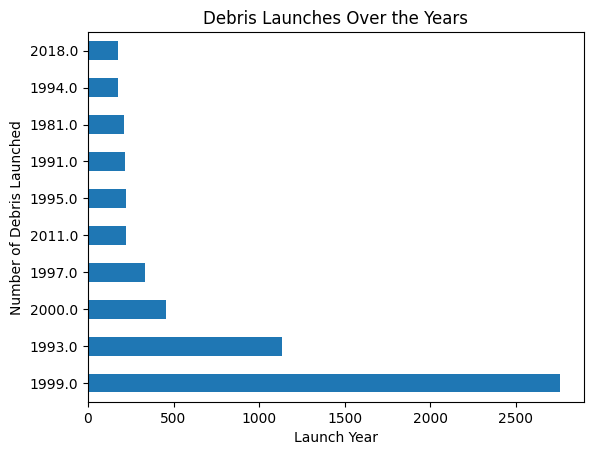

In [74]:
debris_year = debris['LAUNCH_DATE'].value_counts()
debris_year.head(10).plot(kind='barh', xlabel='Launch Year', ylabel='Number of Debris Launched', title='Debris Launches Over the Years')

<Axes: title={'center': 'Top 10 Countries for number of Debris in orbits'}, xlabel='Amount of Debris Caused', ylabel='Country'>

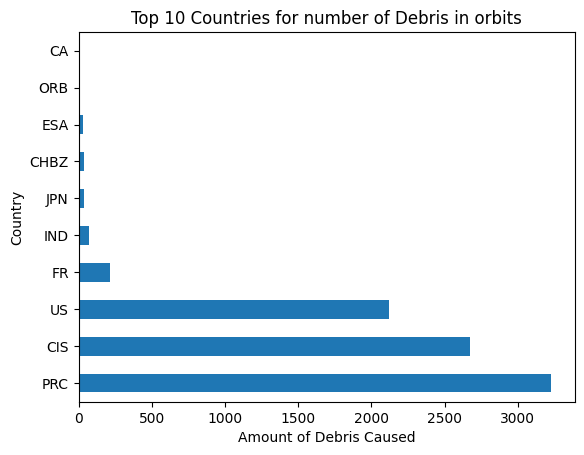

In [75]:
debris_country = debris['COUNTRY_CODE'].value_counts()
debris_country.head(10).plot(kind='barh', xlabel='Amount of Debris Caused', ylabel='Country', title='Top 10 Countries for number of Debris in orbits')


<Axes: title={'center': 'Distribution of RCS Size for Debris'}, xlabel='Number of Debris', ylabel='RCS Size'>

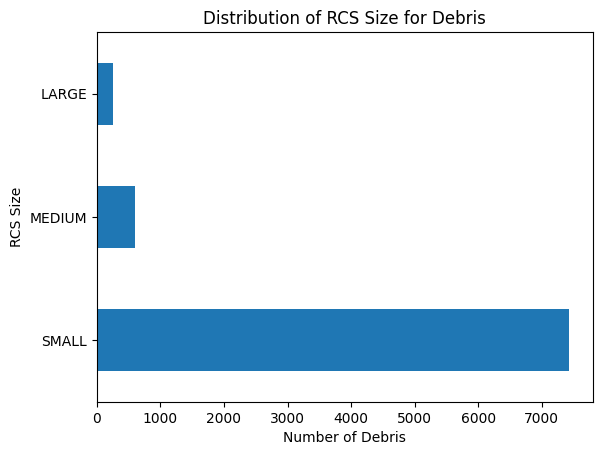

In [76]:
size_distribution = debris['RCS_SIZE'].value_counts()
size_distribution.plot(kind='barh', xlabel='Number of Debris', ylabel='RCS Size', title='Distribution of RCS Size for Debris')